In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from model import Model

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
device

device(type='cuda', index=0)

In [4]:
trainingSet = datasets.MNIST(
    root = "data",
    train = True,
    transform = ToTensor(),
    download = True
)

testSet = datasets.MNIST(
    root = "data",
    train = False,
    transform = ToTensor(),
)

In [5]:
print(f"Training data: { trainingSet.data.shape } | Testing data: { testSet.data.shape }")

Training data: torch.Size([60000, 28, 28]) | Testing data: torch.Size([10000, 28, 28])


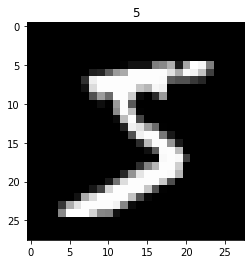

In [6]:
plt.imshow(trainingSet.data[0], cmap = "gray")
plt.title("%i" % trainingSet.targets[0])
plt.show()

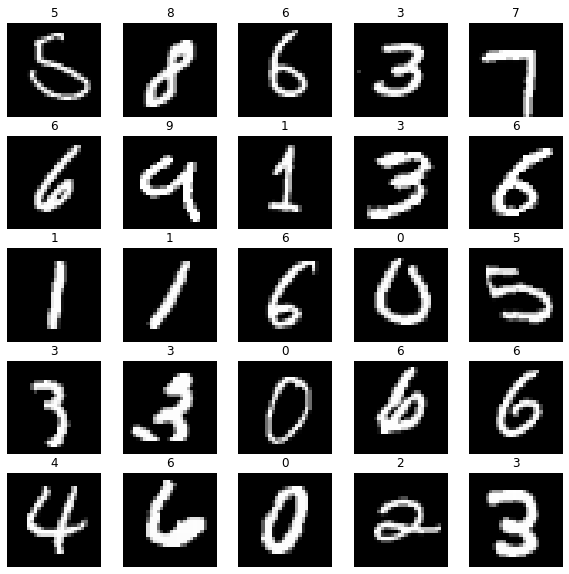

In [7]:
figure = plt.figure(figsize = (10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainingSet), size = (1,)).item()
    img, label = trainingSet[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
loaders = {
    "train" : DataLoader(
        trainingSet,
        batch_size = 100,
        shuffle = True,
        num_workers = 1
    ),
    "test" : DataLoader(
        testSet,
        batch_size = 100,
        shuffle = True,
        num_workers = 1
    ),
}

In [9]:
trainingSet.data[0].shape

torch.Size([28, 28])

In [10]:
model = Model()
model.to(torch.device("cuda:0"))
model

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [11]:
loss_func = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = .01)

In [16]:
epochs = 10

def train(epochs, model, loaders):
    model.train()
    
    total_step = len(loaders["train"])
    
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(loaders["train"]):
            bX = Variable(images.to(device)) # batch x
            bY = Variable(labels.to(device)) # batch y
            
            output = model(bX)[0]
            loss = loss_func(output, bY) 
            
            loss.backward()
            optimizer.step()
            
            if (i + 1) % 100 == 0:
                print("Epoch: [{} / {}], Step: [{} / {}], Loss: {:.4f}".format(
                    epoch + 1, epochs, i + 1, total_step, loss.item()))
                pass
            pass
        pass

In [17]:
train(epochs, model, loaders)

Epoch: [1 / 10], Step: [100 / 600], Loss: 2.2687
Epoch: [1 / 10], Step: [200 / 600], Loss: 2.4737
Epoch: [1 / 10], Step: [300 / 600], Loss: 2.5800
Epoch: [1 / 10], Step: [400 / 600], Loss: 2.6132
Epoch: [1 / 10], Step: [500 / 600], Loss: 2.6147
Epoch: [1 / 10], Step: [600 / 600], Loss: 2.6343
Epoch: [2 / 10], Step: [100 / 600], Loss: 2.6238
Epoch: [2 / 10], Step: [200 / 600], Loss: 2.9146
Epoch: [2 / 10], Step: [300 / 600], Loss: 2.5099
Epoch: [2 / 10], Step: [400 / 600], Loss: 2.6728
Epoch: [2 / 10], Step: [500 / 600], Loss: 3.0246
Epoch: [2 / 10], Step: [600 / 600], Loss: 2.6647
Epoch: [3 / 10], Step: [100 / 600], Loss: 3.0045
Epoch: [3 / 10], Step: [200 / 600], Loss: 2.7354
Epoch: [3 / 10], Step: [300 / 600], Loss: 2.9750
Epoch: [3 / 10], Step: [400 / 600], Loss: 2.8781
Epoch: [3 / 10], Step: [500 / 600], Loss: 2.9946
Epoch: [3 / 10], Step: [600 / 600], Loss: 3.2845
Epoch: [4 / 10], Step: [100 / 600], Loss: 3.3069
Epoch: [4 / 10], Step: [200 / 600], Loss: 2.9643
Epoch: [4 / 10], Ste

In [25]:
def test():
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        
        for images, labels in loaders["test"]:
            images.to(device)
            labels.to(device)
            test_output, last_layer = model(images.to(device))
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels.to(device)).sum().item() / float(labels.to(device).size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
        pass

In [26]:
test()

Test Accuracy of the model on the 10000 test images: 0.08
